# Análisis del uso de las aulas virtuales UIS

## Estadística
### Unidad I: Estadística descriptiva
**Prof. Eliana Bonalde**

___

Algunos métodos para la manipulación y análisis del conjunto de datos de las aulas virtuales. 

Importamos las librerías a utilizar y el archivo en formato .CSV

In [31]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("datos_es.csv") 

In [33]:
#tamaño del archivo
df.shape

(55, 14)

In [34]:
df = df.drop(['Marca temporal'], axis=1)

In [35]:
df.head()

,Carrera,Nivel,"Diariamente, ¿Cuánto tiempo da uso al MOODLE?","De 1 a 5, (siendo 1 el menor y 5 el mayor), ¿Con qué frecuencia realiza pruebas en el MOODLE?","De 1 a 10, (siendo 1 el menor y 10 el mayor), ¿Con qué frecuencia realiza trabajos, talleres o tareas en el MOODLE?",¿Qué uso le ha dado al MOODLE?,¿En qué área cree que el aula virtual le ha sido de más utilidad?,"Del 1 al 10, (siendo 1 el menor y 10 el mayor), ¿Qué tan practico y útil le resultan ser las aulas virtuales?",¿Cuál es la actividad que realiza con más frecuencia en la plataforma MOODLE?,¿Con qué frecuencia utiliza los mensajes de la plataforma MOODLE?,"Si su anterior respuesta fue nunca o poco, ¿Qué servicio de mensajes utiliza para comunicarse con sus profesores?","En su opinión, el calendario que se muestra en la plataforma:",¿Hace uso de otra plataforma educativa dentro de la universidad? ¿Cuál?
0,INGENIERIA DE SISTEMAS,8,1-2 horas,2,2,Presentar examenes,Materias de carrera ( arriba de 5to semestre),8,Tareas,Nunca,Gmail/Hotmail,No le prestó casi atención.,La plataforma de las notas.
1,INGENIERIA CIVIL,5,3-4 horas,3,6,Todas las anteriores,Materias de carrera ( arriba de 5to semestre),8,Talleres,Poco,Correo institucional,Puede mejorar,NaN
2,INGENIERIA ELECTRICA,9,1-2 horas,2,4,Todas las anteriores,Materias de carrera ( arriba de 5to semestre),6,Cuestionarios,Poco,Gmail/Hotmail,"Está completo, bien implementado",NaN
3,INGENIERIA DE SISTEMAS,8,1-2 horas,2,2,Todas las anteriores,Materias de ciencias básicas (ciclo básico),8,Cuestionarios,Poco,Slack,No me he fijado,NaN
4,ECONOMIA,8,1-2 horas,4,7,Todas las anteriores,Materias de carrera ( arriba de 5to semestre),6,Tareas,Nunca,Whatsapp,Puede mejorar,NaN


Renombramos las columnas

In [36]:
df.columns = ['Carrera', 'Nivel', 'Tiempo de uso', 'Frecuencia pruebas', 'Frecuencia talleres',
              'Uso a moodle', 'Area mayor utilidad', 'Practicidad', 'Actividad mayor frecuencia', 
              'Mensajeria', 'Otro serivicio mensajes', 'Calendario','Otra plataforma usada'] 
df.head(1) #muestra solo la primera fila

,Carrera,Nivel,Tiempo de uso,Frecuencia pruebas,Frecuencia talleres,Uso a moodle,Area mayor utilidad,Practicidad,Actividad mayor frecuencia,Mensajeria,Otro serivicio mensajes,Calendario,Otra plataforma usada
0,INGENIERIA DE SISTEMAS,8,1-2 horas,2,2,Presentar examenes,Materias de carrera ( arriba de 5to semestre),8,Tareas,Nunca,Gmail/Hotmail,No le prestó casi atención.,La plataforma de las notas.


Pedimos información sobre los datos (filas y columnas)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Carrera                     55 non-null     object
 1   Nivel                       55 non-null     int64 
 2   Tiempo de uso               55 non-null     object
 3   Frecuencia pruebas          55 non-null     int64 
 4   Frecuencia talleres         55 non-null     int64 
 5   Uso a moodle                55 non-null     object
 6   Area mayor utilidad         55 non-null     object
 7   Practicidad                 55 non-null     int64 
 8   Actividad mayor frecuencia  55 non-null     object
 9   Mensajeria                  55 non-null     object
 10  Otro serivicio mensajes     54 non-null     object
 11  Calendario                  55 non-null     object
 12  Otra plataforma usada       24 non-null     object
dtypes: int64(4), object(9)
memory usage: 5.7+ KB


No hay datos nulos, en caso de haberlo podríamos utilizar la siguiente celda para eliminar las filas que los contengan (está comentada).

In [38]:
#eliminar las filas que contengan datos nulos
#df = df.dropna(axis=0) 

Pedimos los valores filas por columnas.

In [39]:
df['Carrera'].unique()

array(['INGENIERIA DE SISTEMAS', 'INGENIERIA CIVIL',
       'INGENIERIA ELECTRICA', 'ECONOMIA', 'TRABAJO SOCIAL', 'BIOLOGIA',
       'DERECHO', 'INGENIERIA ELECTRONICA', 'QUIMICA', 'GEOLOGIA',
       'FILOSOFIA', 'DISEÑO INDUSTRIAL', 'LICENCIATURA EN MUSICA',
       'INEGINERIA QUIMICA', 'INGENEIRIA MECANICA',
       'LICENCIATURA EN ESPAÑOL Y LITERATURA',
       'MICROBIOLOGIA Y BIOANALISIS', 'LICENCIATURA EN MATEMATICAS',
       'INGENIERIA MECANICA'], dtype=object)

--------------
# Nivel




8


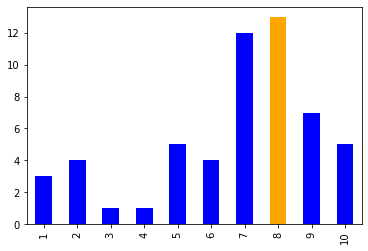

In [40]:
nivel = df['Nivel']
x_values = df['Nivel'].value_counts()
modaNivel = stat.mode(x_values.index)
x_values.sort_index().plot(kind = 'bar', color = ['blue','blue','blue','blue','blue','blue','blue','orange','blue','blue'])
print(modaNivel)

### Andrea acá el analisis pues con palabras sobre la grafica, lo que se observa y lo que se puede inferir 
-----------------------------

----------------
# Carrera

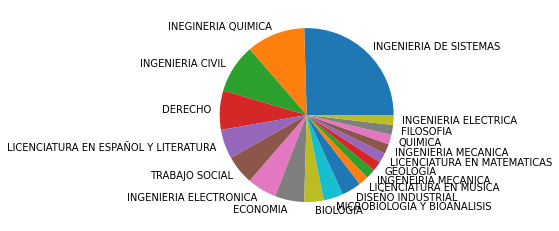

Mayoría de estudiantes que respondieron son del programa de: INGENIERIA DE SISTEMAS


In [41]:
carrera = df['Carrera']
ccarreras = df['Carrera'].value_counts()
modac = stat.mode(carrera)
plt.pie(ccarreras, labels=ccarreras.index)
plt.show()
plt.close('all')
print('Mayoría de estudiantes que respondieron son del programa de: '+ modac)


## Analisis de la carrera
-------------------------------

------------------------------------
# Tiempo de uso de la plataforma MOODLE

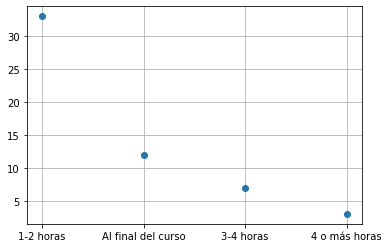

In [42]:
df.replace({'Tiempo de uso':{'Sólo al final del curso, para presentar parciales': 'Al final del curso'}}, inplace=True)
y1 = df['Tiempo de uso'].value_counts()
plt.plot(y1,'o')
plt.grid()

### decir por qué el uso en su mayoría es de 1-2 horas, es decir, darle sentido a esa respuesta.
### una curiosidad de por qué puede ser usada solo al final del curso
------------------------------------------------

-------------------------------------
# Uso para parciales, quices o examenes

<AxesSubplot:>

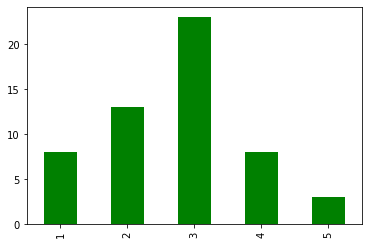

In [87]:
x2 = df['Frecuencia pruebas'].value_counts()
x2.sort_index().plot(kind = 'bar', color= 'green')

In [89]:
ftp = df['Frecuencia pruebas']
mediapp = ftp.mean()
medianpp = ftp.median()
modapp = stat.mode(ftp)
print('La media es: ' + str(mediapp) )
print('La mediana es: ' + str(medianpp))
print('El dato más frecuente fue: '+ str(modapp))

La media es: 2.727272727272727
La mediana es: 3.0
El dato más frecuente fué: 3


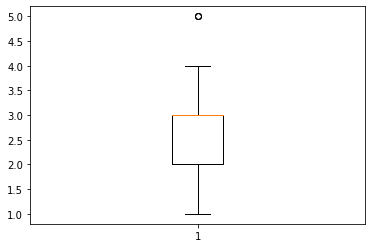

In [51]:
plt.boxplot(df['Frecuencia pruebas'])
plt.show()

### datos atipicos, media, mediana hablar de eso y los percentiles, el dato atipico es el 5 entonces decir por qué s epuede tomar así
---------------------------------------------------

------------------------
# Frecuencia con uso para talleres, trabajos o laboratorios

<AxesSubplot:>

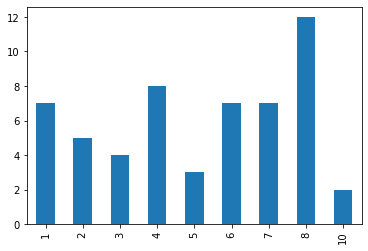

In [79]:
x2 = df['Frecuencia talleres'].value_counts()
x2.sort_index().plot(kind = 'bar')


In [80]:
fta = df['Frecuencia talleres']
mediapt = fta.mean()
medianpt = fta.median()

print('La media es: ' + str(mediapt) )
print('La mediana es: ' + str(medianpt))

La media es: 5.1454545454545455
La mediana es: 6.0


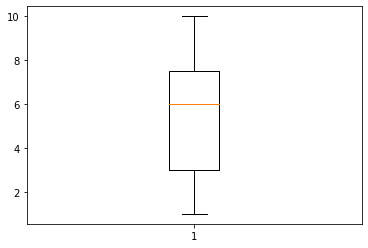

In [58]:
plt.boxplot(df['Frecuencia talleres'])
plt.show()

## hablar de datos atipicos, la media, mediana
--------------------------------

------------------------
# Actividad que más realiza en MOODLE

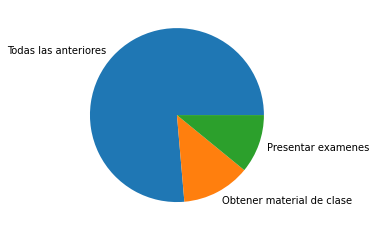

Todas las anteriores


In [91]:
uso = df['Uso a moodle']
usom = df['Uso a moodle'].value_counts()
modau = stat.mode(uso)
plt.pie(usom, labels=usom.index)
plt.show()
plt.close('all')
print(modau)

### hablar de que en general el procentaje que usa la plataforma para todo lo academico y no solo para algún aspecto del mismo
----------

---------------
# Área de mayor utilidad

In [ ]:
df['Area mayor utilidad'].unique()

array(['Materias de carrera ( arriba de 5to semestre)',
       'Materias de ciencias básicas (ciclo básico)', 'Electivas'],
      dtype=object)

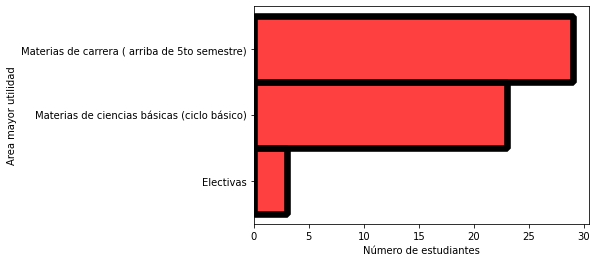

In [ ]:
sns.histplot(data=df, y="Area mayor utilidad", color = 'red')
plt.xlabel('Número de estudiantes')
plt.show()